In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!git clone https://github.com/mohanrajmit/TrafficDataset.git

Cloning into 'TrafficDataset'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 812 (delta 2), reused 6 (delta 1), pack-reused 801
Receiving objects: 100% (812/812), 132.28 MiB | 45.44 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [0]:
label_name=["ambulance","notambulance"]

In [0]:

def load():
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
	 		
			label = imagePath.split("/")[-2]
			print(label)
			print(imagePath)
			#label = imagePath.split(os.path.sep)[-2]
			image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)
	    # treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			#if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				#print("[INFO] processed {}/{}".format(i + 1,
					#len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

In [5]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/TrafficDataset/dataset"))
#print(imagePaths)

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
#sp = SimplePreprocessor(32, 32)
#sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = load()
#data = data.reshape((data.shape[0], 3072))


# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(data, labels,
	test_size=0.25, random_state=42)






[INFO] loading images...
notambulance
/content/TrafficDataset/dataset/notambulance/Image27.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image273.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image8.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image491.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image134.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image495.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image163.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image314.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image419.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image504.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image444.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image330.jpg
notambulance
/content/TrafficDataset/dataset/notambulance/Image479.jpg
notambulance
/content/TrafficDataset/dataset/notambulan

In [6]:
print(x_train.shape)

(649, 32, 32, 3)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
y_train[100],Y_train[100]
#Y_train[10]

Using TensorFlow backend.


(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [0]:
print(x_test.shape)
print(x_train.shape)

(217, 32, 32, 3)
(649, 32, 32, 3)


In [10]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

from keras.layers import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
#model.add()
#ip = Input(shape=(32, 32, 3))
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer="Adadelta",metrics=['accuracy'])

In [32]:
history=model.fit(x_train,Y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(x_test, Y_test))
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 649 samples, validate on 217 samples
Epoch 1/100
649/649 [==============================] - 4s 6ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.3943 - val_acc: 0.7788
Epoch 2/100
649/649 [==============================] - 4s 5ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.3943 - val_acc: 0.7788
Epoch 3/100
649/649 [==============================] - 3s 5ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.3943 - val_acc: 0.7788
Epoch 4/100
649/649 [==============================] - 3s 5ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.3943 - val_acc: 0.7788
Epoch 5/100
649/649 [==============================] - 3s 5ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.3943 - val_acc: 0.7788
Epoch 6/100
649/649 [==============================] - 3s 5ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.3943 - val_acc: 0.7788
Epoch 7/100
649/649 [==============================] - 3s 5ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.3943 - val_acc: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


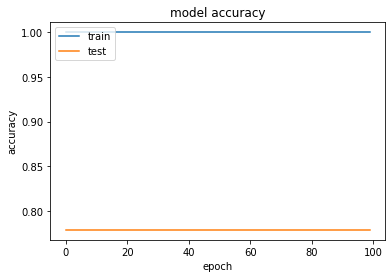

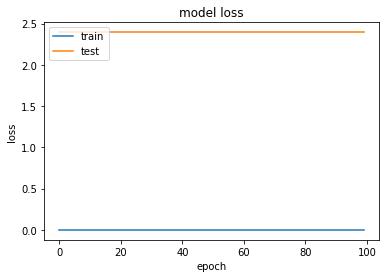

In [30]:
import matplotlib.pyplot as plt
# summarize history for accuracy
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()